<a href="https://colab.research.google.com/github/JoanYego/Hypothesis-Testing-Autolib-Dataset/blob/master/Hypothesis_Testing_(Autolib_Project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Specifying the Research Question

> The goal of this project is to demonstrate the concept of hypothesis testing by investigating a claim about blue cars using a dataset from an electric car sharing service company called Autolib. More specifically, I will be comparing the blue car usage rates in Paris and Hauts-de-Seine, which are two French cities. Below are the specific hypotheses of interest in this analysis:

> Null Hypothesis: For both Paris and Hauts-de-Seine the average number of blue cars picked up during weekends is the same.

>> Ho : μ1 = μ2

> Alternate Hypothesis: The average number of blue cars picked up during the weekend is different for Paris and Hauts-de-Seine.

>> Ha : μ1 ≠ μ2 

# Defining the Metric for Success

> This project will be considered a success when we are able to perform the following tasks:

>*   Specify the null and alternate hypothesis.
>*   Conduct EDA to uncover underlying patterns within the dataset that can guide the sampling technique.
>*   Perform hypothesis testing and interpret the results.
>*   Provide project summary and conclusions.

# Understanding the Research Context

> Autolib was an electric car sharing service company in France that was operational between 2011 and 2018. The company had three types of electric cars i.e blue cars, Utilib cars and Utilib 1.4 cars. Blue cars were most popularly used. These cars were available across various cities and postal codes in France and renters could pick up cars in one station then drop them off at a different station that was closer to their destination. The dataset used in this analysis allows us to understand various elecric car usage patterns for the company. The available data contains usage information for various postal codes between January 2018 and June 2018. 

> For this project, I decided to focus on two cities Paris (department # 75) and Hauts-de-Seine (department # 92). Compared to other cities available in the dataset, these two cities are the top two most densely populated. Even though Hauts-de-Seine is larger than Paris in terms of total area in square kilometers, Paris is much more densely populated and more popular with tourists. As such, I suspect that the average blue car usage rates for those two cities are different. Usage rates are generally higher during the weekends therefore the analysis will focus on this time period.




# Experimental Design

> Below are the steps that will be conducted in this analysis in order to fulfill the project goal satisfactorily:


>*   Load data and preview preliminary characteristics of the dataset
>*   Data cleaning (check for and deal with outliers, anomalies and missing data)
>*   Perform univariate and bivariate analysis
>*   Specify the null and alternate hypotheses
>*   Specify the sampling technique
>*   Perform hypothesis testing
>*   Discuss the hypothesis test results
>*   Provide project summary and conclusion

# Data Relevance

> The dataset used in the analysis contains records of electric car usage in France from January 2018 to June 2018. This dataset was originally sourced from opendataparis.com. Some of the information in the dataset includes postal code, day of the week and total cars returned or picked up for blue cars, Utilib cars and Utilib 1.4 cars.The data available for this analysis is valid and useful towards achieving the project goal given the availability of both numeric and categorical attributes.

# Reading the Data

In [55]:
# Importing relevant python libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [56]:
# Loading data from the source (csv file)

# Dataset Url: [http://bit.ly/DSCoreAutolibDataset

data = pd.read_csv('autolib.csv')
data

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0


# Checking the Data

In [57]:
# Checking the top 5 records of the dataset

data.head(5)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [58]:
# Checking the bottom 5 records of the dataset

data.tail(5)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [59]:
# Previewing a random sample of the dataset

data.sample(n=5)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
1059,75007,5/7/2018,1437,0,weekday,239,249,13,14,15,16,85,90
4758,92110,3/25/2018,1380,6,weekend,21,24,1,2,4,4,0,0
15635,95100,1/19/2018,1440,4,weekday,15,13,0,0,1,2,0,0
8950,92400,3/19/2018,1440,0,weekday,88,79,2,2,3,4,4,4
1359,75009,4/25/2018,1440,2,weekday,314,302,13,14,31,30,72,71


In [60]:
# Checking the no. of rows and columns

data.shape

(16085, 13)

In [61]:
# Checking datatypes for each attribute and previewing the existence of null values

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


# Data Cleaning

In [62]:
# Since we are interested in learning more about blue cars only
# we can drop all other unnecessary columns

data = data.drop(data.columns[7:], axis=1)
data.head(5)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum
0,75001,1/1/2018,1440,0,weekday,110,103
1,75001,1/2/2018,1438,1,weekday,98,94
2,75001,1/3/2018,1439,2,weekday,138,139
3,75001,1/4/2018,1320,3,weekday,104,104
4,75001,1/5/2018,1440,4,weekday,114,117


In [63]:
# Renaming columns for uniformity

data.columns = ['postal_code', 'date', 'daily_data_points', 'day_of_week', 'day_type', 'total_bluecars_taken', 
                'total_bluecars_returned']
data.head(1)

,postal_code,date,daily_data_points,day_of_week,day_type,total_bluecars_taken,total_bluecars_returned
0,75001,1/1/2018,1440,0,weekday,110,103


In [64]:
# Checking for duplicate data

data.duplicated().any()

False

In [65]:
# Change Date column to datetime type
data['date'] = pd.to_datetime(data['date'], format='%m/%d/%Y')

In [66]:
# Creating a new 'month' attribute

data['month'] = data['date'].dt.month

In [67]:
# Replacing day_of week code with actual names

encode = {"day_of_week" : {0:"monday", 1:"tuesday", 2:"wednesday", 3:"thursday",
                           4:"friday", 5:"saturday", 6:"sunday"}, "month" : {1:"January",
                          2:"February", 3:"March", 4:"April", 5:"May", 6:"June"}}

In [68]:
data.replace(encode, inplace = True)
data.head()

,postal_code,date,daily_data_points,day_of_week,day_type,total_bluecars_taken,total_bluecars_returned,month
0,75001,2018-01-01,1440,monday,weekday,110,103,January
1,75001,2018-01-02,1438,tuesday,weekday,98,94,January
2,75001,2018-01-03,1439,wednesday,weekday,138,139,January
3,75001,2018-01-04,1320,thursday,weekday,104,104,January
4,75001,2018-01-05,1440,friday,weekday,114,117,January


## Outliers

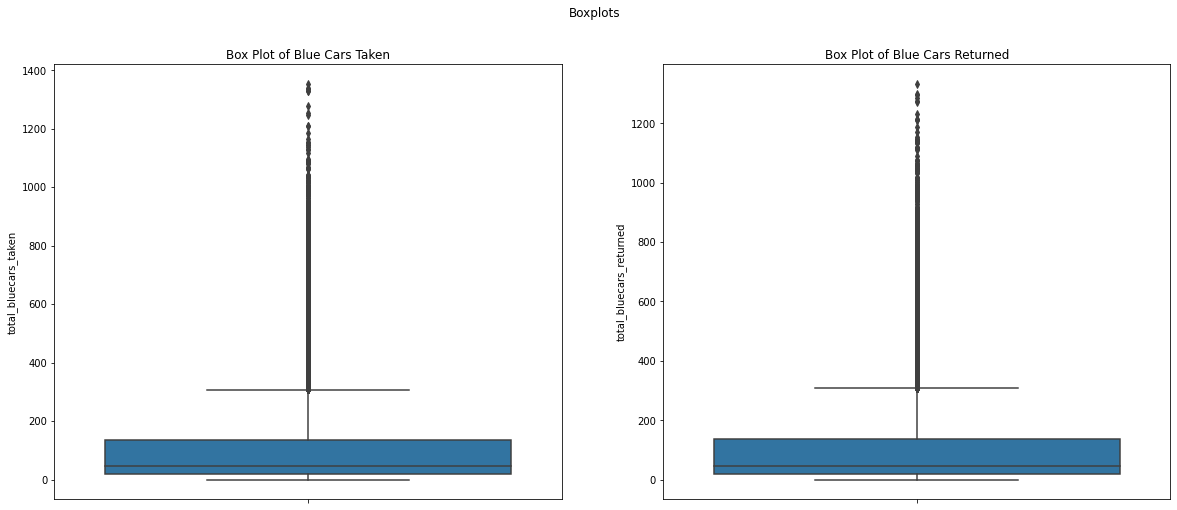

In [69]:
# Checking for Outliers

fig, ax = plt.subplots(1,2, figsize=(20,8))
fig.suptitle('Boxplots')
sns.boxplot(data=data, y = "total_bluecars_taken", ax=ax[0])
ax[0].set_title('Box Plot of Blue Cars Taken')
sns.boxplot(data=data, y = "total_bluecars_returned", ax=ax[1])
ax[1].set_title('Box Plot of Blue Cars Returned')


plt.show()



>* There are several 'outliers' in the dataset for the number of blue cars taken and returned. However, there is no sufficient evidence that point to the likelihhod of these outliers being erroneous records. Since the outliers could be valid observations, we will not delete them.

## Anomalies

In [70]:
# Checking for Anomalies
# 'blue cars taken' variable

q1_taken = data['total_bluecars_taken'].quantile(.25)
q3_taken = data['total_bluecars_taken'].quantile(.75)

iqr_taken = q3_taken - q1_taken

# 'blue cars returned' variable
q1_returned = data['total_bluecars_returned'].quantile(.25)
q3_returned = data['total_bluecars_returned'].quantile(.75)

iqr_returned = q3_returned - q1_returned

# 'available data points' variable
q1_points = data['daily_data_points'].quantile(.25)
q3_points = data['daily_data_points'].quantile(.75)

iqr_points = q3_points - q1_points

print(iqr_taken, iqr_returned, iqr_points) 



115.0 115.0 1.0


> The results show that the blue cars taken and blue cars returned attributes both have 115 records that are not within the middle 50% of the records in those columns.

> The daily available data points attribute has only 1 record that does not lie within the upper and lower bounds.

## Missing Values

In [71]:
# Confirming that there are no nulls 

data.isnull().sum()

postal_code                0
date                       0
daily_data_points          0
day_of_week                0
day_type                   0
total_bluecars_taken       0
total_bluecars_returned    0
month                      0
dtype: int64

# Exploratory Analysis

## Univariate Analysis

### Visualizations

> Ploting various univariate summaries and recording observations

In [72]:
# frequency table for the postal code attribute

data.postal_code.value_counts()

94130    156
92310    156
78140    156
94700    156
95100    156
        ... 
93150    151
93370    149
92340    147
93200    126
93390     84
Name: postal_code, Length: 104, dtype: int64

In [73]:
# How often does each day of the week appear?

data.day_of_week.value_counts()

monday       2374
tuesday      2363
sunday       2274
friday       2271
thursday     2268
wednesday    2268
saturday     2267
Name: day_of_week, dtype: int64

In [74]:
# How often does each day type appear?

data.day_type.value_counts()

weekday    11544
weekend     4541
Name: day_type, dtype: int64

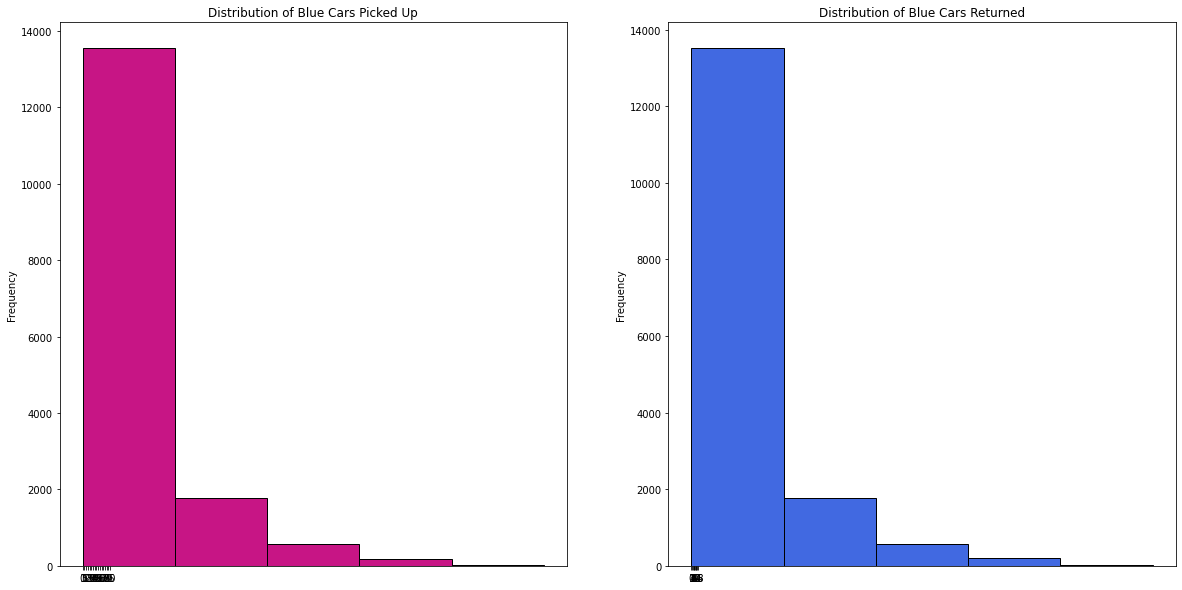

In [75]:
# plotting histograms to show the distribution of blue cars taken and returned

fig,ax=plt.subplots(1,2,figsize=(20,10))
data['total_bluecars_taken'].plot.hist(ax=ax[0],bins=5,edgecolor='black',color='mediumvioletred')
ax[0].set_title('Distribution of Blue Cars Picked Up')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data['total_bluecars_returned'].plot.hist(ax=ax[1],color='royalblue',bins=5,edgecolor='black')
ax[1].set_title('Distribution of Blue Cars Returned')
x2=list(range(0,20,2))
ax[1].set_xticks(x2)
plt.show()

> We notice that the two attributes above do not follow a normal distribution. Instead, they are skewed to the right.

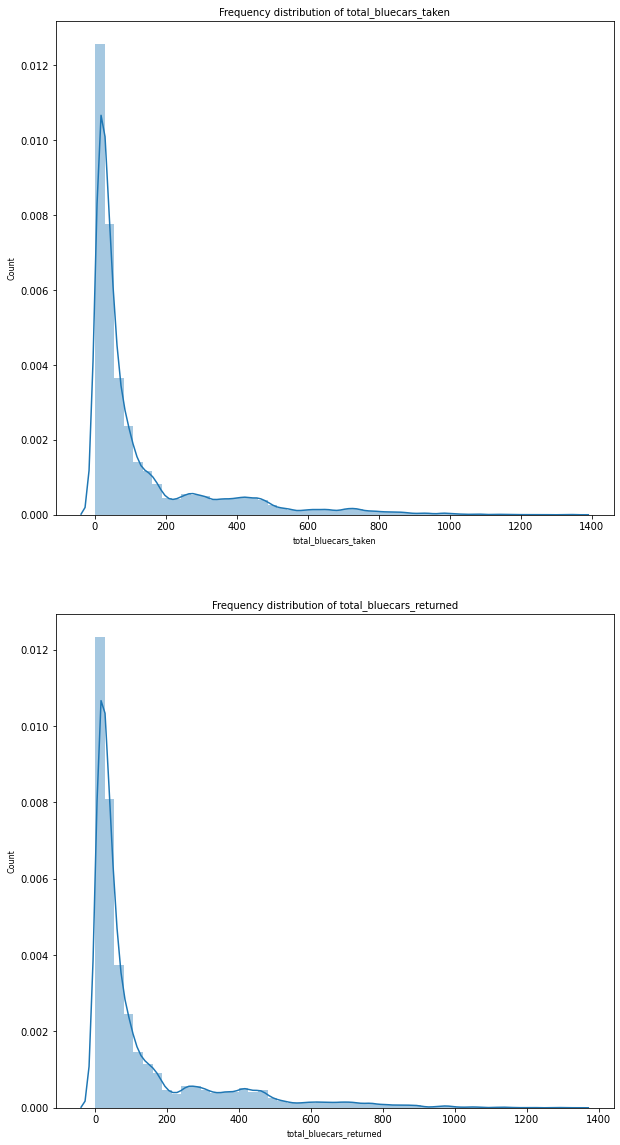

In [76]:
# Frequency distribution plots

col_names = ['total_bluecars_taken','total_bluecars_returned']
fig, ax = plt.subplots(len(col_names), figsize=(10,20))

for i, col_val in enumerate(col_names):

    sns.distplot(data[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Frequency distribution of '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()



### Measures of Central Tendency

In [77]:
# We can check the mean, mode and median of blue cars taken in the dataset

mean_taken = data['total_bluecars_taken'].mean()
median_taken = data['total_bluecars_taken'].median()
mode_taken = data['total_bluecars_taken'].mode()

print(mean_taken, median_taken, mode_taken)


125.92695057506994 46.0 0    12
dtype: int64


In [78]:
# We can check the mean, mode and median of blue cars returned in the dataset

mean_returned = data['total_bluecars_returned'].mean()
median_returned = data['total_bluecars_returned'].median()
mode_returned = data['total_bluecars_returned'].mode()

print(mean_returned, median_returned, mode_returned)

125.912713708424 46.0 0    13
dtype: int64


### Measures of Dispersion

In [79]:
# Checking the various measures of dispersion for the number of blue cars taken variable
# standard deviation, variance, range, skewness and kurtosis

taken_std = data['total_bluecars_taken'].std()
taken_var = data['total_bluecars_taken'].var()

taken_max = data['total_bluecars_taken'].max()
taken_min = data['total_bluecars_taken'].min()
taken_range = taken_max - taken_min

taken_skew = data['total_bluecars_taken'].skew()
taken_kurt = data['total_bluecars_taken'].kurt()

print('Standard Deviation is ' + str(taken_std))
print('Variance is ' + str(taken_var))
print('Range is ' + str(taken_range))
print('Skewness is ' + str(taken_skew))
print('Kurtosis is ' + str(taken_kurt))

Standard Deviation is 185.42657876727893
Variance is 34383.01611333789
Range is 1352
Skewness is 2.4063548974959086
Kurtosis is 6.172692305510042


In [80]:
# Checking the various measures of dispersion for the blue cars returned variable
# standard deviation, variance, range, skewness and kurtosis

returned_std = data['total_bluecars_returned'].std()
returned_var = data['total_bluecars_returned'].var()

returned_max = data['total_bluecars_returned'].max()
returned_min = data['total_bluecars_returned'].min()
returned_range = returned_max - returned_min

returned_skew = data['total_bluecars_returned'].skew()
returned_kurt = data['total_bluecars_returned'].kurt()

print('Standard Deviation of the variable is ' + str(returned_std))
print('Variance of the variable is ' + str(returned_var))
print('Range of the variable is' + str(returned_range))
print('Skewness of the variable is ' + str(returned_skew))
print('Kurtosis of the variable is ' + str(returned_kurt))

Standard Deviation of the variable is 185.50153480148427
Variance of the variable is 34410.819413706275
Range of the variable is1332
Skewness of the variable is 2.412084978838923
Kurtosis of the variable is 6.1862880957582345


## Bivariate Analysis

> In this analysis, we will check various relationships between different measures and dimensions

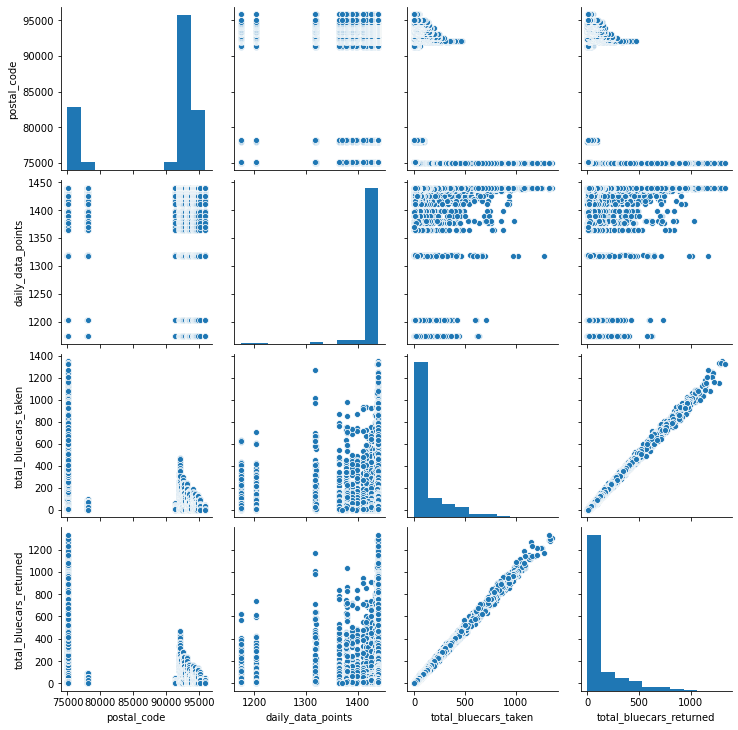

In [81]:
# Ploting the bivariate summaries 

sns.pairplot(data)
plt.show()

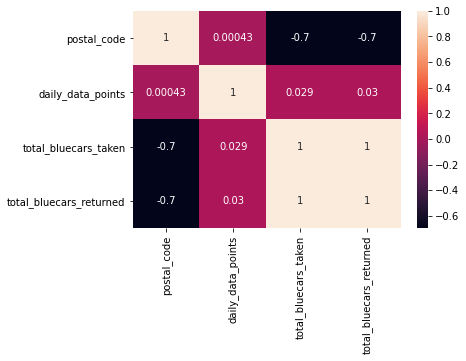

In [82]:
# Plotting the Pearson correlation coefficient among numeric variables


sns.heatmap(data.corr(),annot=True)
plt.show()

> The number of blue cars taken and returned have a perfect positive correlation.

> The correlation with the postal code can be ignored here since the postal code is a qualitative attribute even though it is coded with a numeric data type.

Text(-2.5749999999999957, 0.5, 'Blue Cars Returned')

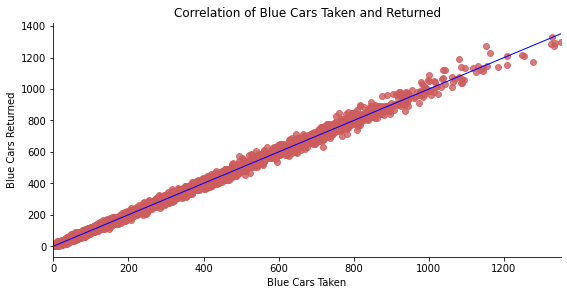

In [83]:
# scatter plot of blue cars taken and blue cars returned

sns.lmplot('total_bluecars_taken', "total_bluecars_returned", data, scatter_kws={'marker':'o', 'color': 'indianred'}, 
           line_kws={'linewidth':1,'color':'blue'}, height = 4, aspect = 2)

plt.title("Correlation of Blue Cars Taken and Returned")
plt.xlabel('Blue Cars Taken')
plt.ylabel("Blue Cars Returned")

In [84]:
# Average number of blue cars taken by day of week

data.groupby(['day_of_week'])['total_bluecars_taken'].mean()

day_of_week
friday       127.056803
monday       111.159646
saturday     156.124393
sunday       146.071240
thursday     116.052469
tuesday      110.850614
wednesday    115.453704
Name: total_bluecars_taken, dtype: float64

In [85]:
# Average number of blue cars returned by day of week

data.groupby(['day_of_week'])['total_bluecars_returned'].mean()

day_of_week
friday       125.948481
monday       111.545072
saturday     155.081606
sunday       148.986368
thursday     115.944004
tuesday      110.228523
wednesday    114.935185
Name: total_bluecars_returned, dtype: float64

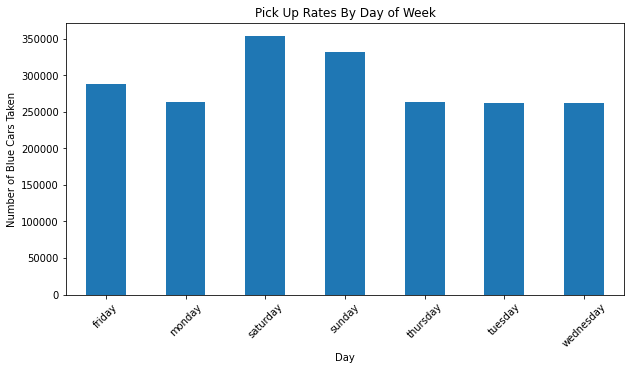

In [86]:
# Bar chart showing total number of blue cars picked up by day of week

data.groupby('day_of_week')['total_bluecars_taken'].sum().plot(kind='bar', figsize=(10,5))
plt.xlabel("Day")
plt.xticks(rotation=45)
plt.ylabel("Number of Blue Cars Taken")
plt.title("Pick Up Rates By Day of Week")
plt.show()

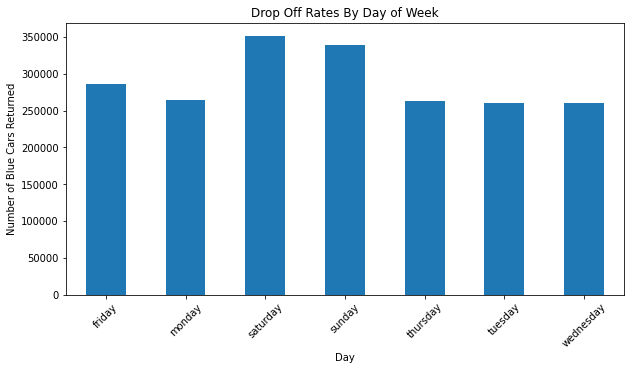

In [87]:
# Bar chart showing total number of blue cars returned by day of week

data.groupby('day_of_week')['total_bluecars_returned'].sum().plot(kind='bar', figsize=(10,5))
plt.xlabel("Day")
plt.xticks(rotation=45)
plt.ylabel("Number of Blue Cars Returned")
plt.title("Drop Off Rates By Day of Week")
plt.show()

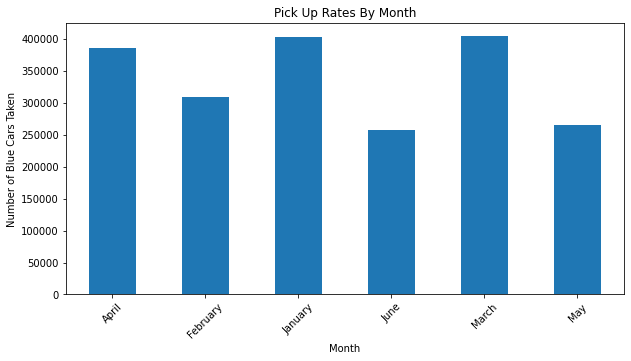

In [88]:
# Bar chart showing total number of blue cars picked up month

data.groupby('month')['total_bluecars_taken'].sum().plot(kind='bar', figsize=(10,5))
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.ylabel("Number of Blue Cars Taken")
plt.title("Pick Up Rates By Month")
plt.show()

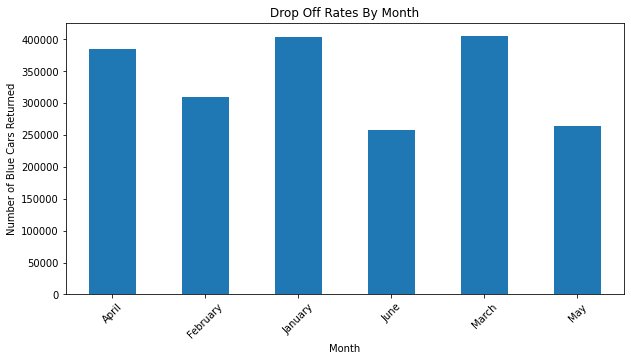

In [89]:
# Bar chart showing total number of blue cars returned month

data.groupby('month')['total_bluecars_returned'].sum().plot(kind='bar', figsize=(10,5))
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.ylabel("Number of Blue Cars Returned")
plt.title("Drop Off Rates By Month")
plt.show()

# Specifying the Hypotheses

> A quick google search shows that postal codes in France are organized by departments (which can also be described as cities). For instance, all postal codes for Paris begin with the number 75. To compress the dataset, we can group various Paris postal codes into one since they represent a similar geographical location i.e. city of Paris. We can do this for all other postal codes. As mentioned earlier, this analysis will focus on comparing the weekend blue car usage rates for Paris and Hauts-de-Seine.


> Null Hypothesis: For both Paris and Hauts-de-Seine the average number of blue cars picked up during weekends is the same.

>    Ho : μ1 = μ2 (where μ1 is the mean for Paris and μ2 is the mean for Hauts-de-Seine)

> Alternate Hypothesis: The average number of blue cars picked up during the weekend is not the same for Paris and Hauts-de-Seine.

>    Ha : μ1 ≠ μ2

In [90]:
# Checking all unique postal codes in the dataset

data['postal_code'].unique()

array([75001, 75002, 75003, 75004, 75005, 75006, 75007, 75008, 75009,
       75010, 75011, 75012, 75013, 75014, 75015, 75016, 75017, 75018,
       75019, 75020, 75112, 75116, 78000, 78140, 78150, 91330, 91370,
       91400, 92000, 92100, 92110, 92120, 92130, 92140, 92150, 92160,
       92170, 92190, 92200, 92210, 92220, 92230, 92240, 92250, 92260,
       92270, 92290, 92300, 92310, 92320, 92330, 92340, 92350, 92360,
       92370, 92380, 92390, 92400, 92410, 92420, 92500, 92600, 92700,
       92800, 93100, 93110, 93130, 93150, 93170, 93200, 93230, 93260,
       93300, 93310, 93350, 93360, 93370, 93390, 93400, 93440, 93500,
       93600, 93700, 93800, 94000, 94100, 94110, 94120, 94130, 94140,
       94150, 94160, 94220, 94230, 94300, 94340, 94410, 94450, 94500,
       94700, 94800, 95100, 95870, 95880])

In [91]:
# Coding all postal codes with the city they represent

# create a list of our conditions
conditions = [
    (data['postal_code'] >= 75000) & (data['postal_code'] <= 75999),
    (data['postal_code'] >= 78000) & (data['postal_code'] <= 78999),
    (data['postal_code'] >= 91000) & (data['postal_code'] <= 91999),
    (data['postal_code'] >= 92000) & (data['postal_code'] <= 92999),
    (data['postal_code'] >= 93000) & (data['postal_code'] <= 93999),
    (data['postal_code'] >= 94000) & (data['postal_code'] <= 94999),
    (data['postal_code'] >= 95000) & (data['postal_code'] <= 95999),
    ]

# create a list of the values we want to assign for each condition
values = ['Paris', 'Yvelines', 'Essonne', 'Hauts-de-Seine', 'Seine-Saint_Denis', 'Val-de-Marne', 'Val-dOise']

# create a new column and use np.select to assign values to it using our lists as arguments
data['city'] = np.select(conditions, values)

# display updated DataFrame
data.head()

,postal_code,date,daily_data_points,day_of_week,day_type,total_bluecars_taken,total_bluecars_returned,month,city
0,75001,2018-01-01,1440,monday,weekday,110,103,January,Paris
1,75001,2018-01-02,1438,tuesday,weekday,98,94,January,Paris
2,75001,2018-01-03,1439,wednesday,weekday,138,139,January,Paris
3,75001,2018-01-04,1320,thursday,weekday,104,104,January,Paris
4,75001,2018-01-05,1440,friday,weekday,114,117,January,Paris


In [92]:
# Checking the new city attribute

data['city'].unique()

array(['Paris', 'Yvelines', 'Essonne', 'Hauts-de-Seine',
       'Seine-Saint_Denis', 'Val-de-Marne', 'Val-dOise'], dtype=object)

# Sampling Approach

> Since we want to compare samples from two different cities i.e usage in Paris versus Hauts-de-Seine, stratified random sampling is the best sampling technique to use. In this case, the ‘city’ becomes the only strata useful in our sampling technique. Pick up and drop off stations are unique to postal codes/city. A pick up station can only exists in one postal code or city. Therefore, a car pick up or drop off recorded in a particular station belongs to a unique city. Using only one strata ensures that each record of usage has an equal chance of being selected during sampling. Each stratum has no overlapping sample therefore no bias in the sampling technique.

> In addition, the sample chosen needs to reflect the structure of the target dataset. Our selected sample should reflect this distribution to ensure that it is as representative to the entire target population as possible. To execute the sampling, we would split the target population into the two stratum and order each record from 1 to N for both Paris and Hauts-de-Seine stratum. We need the sample size of each strata to be proportionate to the target population size of that particular strata.


In [93]:
# Creating a new dataframe with only Paris and Hauts-de-Seine
# and only weekend records which is the target records

data_final = data.loc[data['city'].isin(['Paris','Hauts-de-Seine']) & data['day_type'].isin(['weekend'])]
data_final

,postal_code,date,daily_data_points,day_of_week,day_type,total_bluecars_taken,total_bluecars_returned,month,city
5,75001,2018-01-06,1437,saturday,weekend,187,185,January,Paris
6,75001,2018-01-07,1440,sunday,weekend,180,180,January,Paris
12,75001,2018-01-13,1440,saturday,weekend,224,223,January,Paris
13,75001,2018-01-14,1440,sunday,weekend,193,193,January,Paris
19,75001,2018-01-20,1439,saturday,weekend,217,217,January,Paris
...,...,...,...,...,...,...,...,...,...
9950,92800,2018-06-03,1440,sunday,weekend,111,118,June,Hauts-de-Seine
9956,92800,2018-06-09,1440,saturday,weekend,117,110,June,Hauts-de-Seine
9957,92800,2018-06-10,1440,sunday,weekend,97,113,June,Hauts-de-Seine
9963,92800,2018-06-16,1440,saturday,weekend,115,112,June,Hauts-de-Seine


In [94]:
data_final.head(4)

,postal_code,date,daily_data_points,day_of_week,day_type,total_bluecars_taken,total_bluecars_returned,month,city
5,75001,2018-01-06,1437,saturday,weekend,187,185,January,Paris
6,75001,2018-01-07,1440,sunday,weekend,180,180,January,Paris
12,75001,2018-01-13,1440,saturday,weekend,224,223,January,Paris
13,75001,2018-01-14,1440,sunday,weekend,193,193,January,Paris


In [95]:
data_final.tail(4)

,postal_code,date,daily_data_points,day_of_week,day_type,total_bluecars_taken,total_bluecars_returned,month,city
9956,92800,2018-06-09,1440,saturday,weekend,117,110,June,Hauts-de-Seine
9957,92800,2018-06-10,1440,sunday,weekend,97,113,June,Hauts-de-Seine
9963,92800,2018-06-16,1440,saturday,weekend,115,112,June,Hauts-de-Seine
9964,92800,2018-06-17,1440,sunday,weekend,102,106,June,Hauts-de-Seine


In [96]:
# Checking the distribution of usage/records by city

data_final['city'].value_counts()

Hauts-de-Seine    1578
Paris              968
Name: city, dtype: int64

In [97]:
# Stratified sample
# We will choose a sample size of 10% of all target records

sample = data_final.groupby('city', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.1))

# proportion of the stratified sample
print(sample['city'].value_counts())

# Check the stratified output
print(sample)

Hauts-de-Seine    158
Paris              97
Name: city, dtype: int64
      postal_code       date  ...     month            city
6101        92210 2018-01-21  ...   January  Hauts-de-Seine
5023        92130 2018-02-04  ...  February  Hauts-de-Seine
7787        92320 2018-06-10  ...      June  Hauts-de-Seine
5127        92130 2018-06-02  ...      June  Hauts-de-Seine
9606        92600 2018-04-21  ...     April  Hauts-de-Seine
...           ...        ...  ...       ...             ...
3288        75116 2018-01-13  ...   January           Paris
3281        75116 2018-01-06  ...   January           Paris
1213        75008 2018-05-05  ...       May           Paris
2181        75014 2018-06-17  ...      June           Paris
108         75001 2018-04-22  ...     April           Paris

[255 rows x 9 columns]


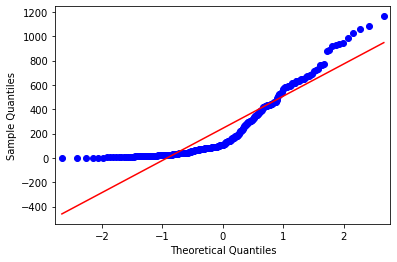

In [98]:
# Performing normality test on the sample selected

from statsmodels.graphics.gofplots import qqplot

# q-q plot

qqplot(sample['total_bluecars_taken'], line='s')
plt.show()

> We do not expect the sample to have a normal distribution since the dataset contained a lot of outliers.

> We will not drop outliers in this case since they could be valid observations.

> More importantly, the fact that the data does not have a normal distribution will not affect our hypothesis testing that much since we have a relatively large sample size to work with (n is much higher than 30).

# Hypothesis Testing

> To conduct hypothesis testing, we will use a two sample z-test and p-value to either reject or accept the null hypothesis.

> Below are the reasons why we choose to use the z-test as the appropriate test statistic:

>* The sample size is greater than 30. 

>* Data points are independent from each other.

>* The sample data has been randomly selected from a population, so each item has an equal chance of being selected.



In [104]:
# First we need to define the two samples separately

paris = sample[(sample['city'] == 'Paris')]
hauts = sample[(sample['city'] == 'Hauts-de-Seine')]

print(paris)
print(hauts)

      postal_code       date  ...     month   city
2797        75018 2018-06-09  ...      June  Paris
101         75001 2018-04-15  ...     April  Paris
1081        75007 2018-06-09  ...      June  Paris
1608        75011 2018-02-18  ...  February  Paris
1848        75012 2018-05-27  ...       May  Paris
...           ...        ...  ...       ...    ...
3288        75116 2018-01-13  ...   January  Paris
3281        75116 2018-01-06  ...   January  Paris
1213        75008 2018-05-05  ...       May  Paris
2181        75014 2018-06-17  ...      June  Paris
108         75001 2018-04-22  ...     April  Paris

[97 rows x 9 columns]
      postal_code       date  ...     month            city
6101        92210 2018-01-21  ...   January  Hauts-de-Seine
5023        92130 2018-02-04  ...  February  Hauts-de-Seine
7787        92320 2018-06-10  ...      June  Hauts-de-Seine
5127        92130 2018-06-02  ...      June  Hauts-de-Seine
9606        92600 2018-04-21  ...     April  Hauts-de-Seine
...  

## Significance Level

> The level of significance of a test is the probability of rejecting the null hypothesis when it is true. For this analysis, the significance level chosen is 0.05 or 5% .

> If the p-value calculated from the test statistic is less than 0.05 then we reject the null hypothesis. If the value is greater than or equal to 0.05 then we accept the null hypothesis.

## Critical Value 

> Since α = 0.05, and the test statistic is a one tailed test, the critical value of z is 1.645 according to the z critical value table.

## Z-score and p-value

In [105]:
# Next, we calculate the z-score and p value

from scipy import stats
from statsmodels.stats import weightstats as stests

ztest ,pval1 = stests.ztest(x1=paris['total_bluecars_taken'], x2=hauts['total_bluecars_taken'], value=0,alternative='two-sided')
print(float(pval1))
if pval1<0.05:
    print("Reject Null Hypothesis")
else:
    print("Accept Null Hypothesis")

7.161676119430548e-70
Reject Null Hypothesis


> We can see that the p-value from the two sample z-test is less than 0.05 therefore we reject the null hypothesis

In [101]:
print(ztest)

17.669826543943937


> The z statistic is much higher than the z critical value which further depicts that we should reject the null hypothesis

## Power of the test

In [102]:
# Checking the power of the two sample z test

from statsmodels.stats.power import zt_ind_solve_power

alpha=0.05
ratio=(158/97)
effect_size= 0.3

statistical_power = zt_ind_solve_power(effect_size=effect_size, nobs1=97, alpha=alpha, power=None, ratio=ratio, alternative='two-sided')
print("The statistical power is: {0}".format(statistical_power))

The statistical power is: 0.6427518155138209


> The power of the test conducted is 64%. Ideally, this should be closer to 90% for a more significant statistical test.

> Some of the factors that could have affected the statistical power of the test include:

>* Sample sizes for the two strata were not the same.

>* The population did not follow a normal distribution.

# Hypothesis Testing Results and Interpretation

> As mentioned, we calculated the p value of the two sample z test and found that the p values is 7.161676119430548e-70 which is much less than 0.05. Therefore, we reject the null hypothesis. This means that the average number of blue cars picked up on weekends is not the same for Paris and that for Hauts-de-Seine. In this case, we accept the alternate hypothesis.

> The calculated z statistic is 17.7 against the expected critical value of 1.645. This means that the data points are 17.7 standard deviations away from the mean. This is further evidence that we need to reject the null hypothesis.

# Project Summary and Conclusions

> We have successfully defined the null and alternate hypothesis, executed the sampling technique and carried out hypothesis testing which led to the rejection of the null hypothesis. We concluded that the average number of blue cars picked up in Hauts-de-Seine is not the same as that in Paris. 

> One factor that needs further investigation is the low power of the test. The high variance in the target population could have impacted the test statistic and contributed to a high likelihood of a Type I error.